Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


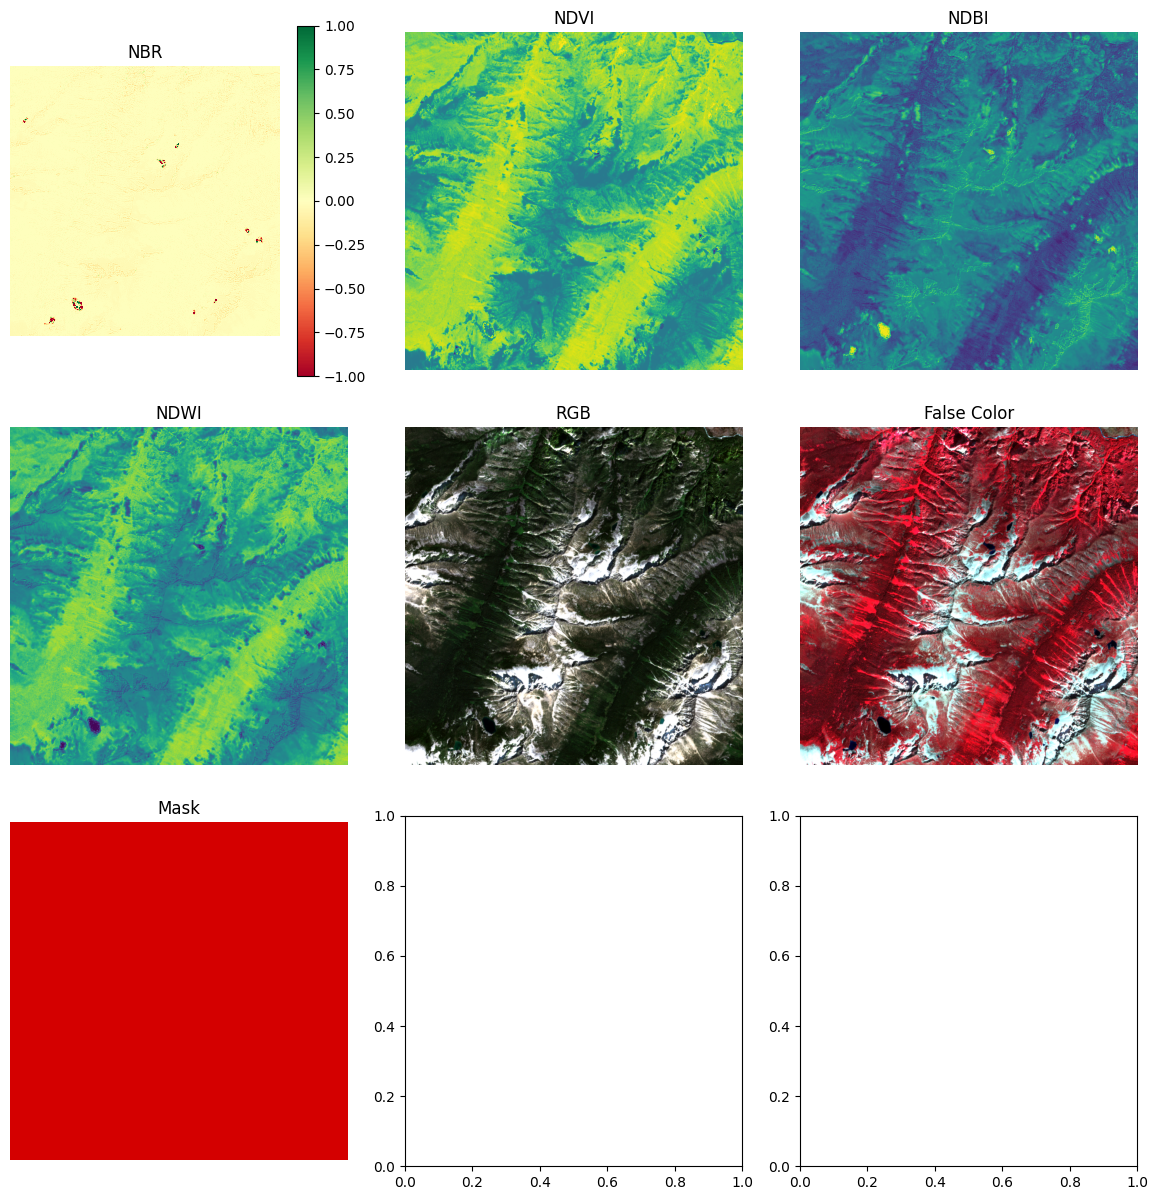

In [2]:
import dataset
from pathlib import Path
from dotenv import load_dotenv
import os

load_dotenv()

data_path = Path(os.getenv("prepare_dataset_folder"))
split = "train"  # or 'val' or 'test', depending on your dataset_splits.csv

# Instantiate the dataset
forest_sat_dataset = dataset.MineSATDataset(split=split, data_path=data_path)

index = 3

# Display the transformed images including NBR and NDVI
forest_sat_dataset.display_transformed_images(index)


In [ ]:

import numpy as np
import csv

def save_numerical_values_to_csv(numerical_values, csv_filename):
    # Flatten the numerical values and prepare them for writing to a CSV file
    flattened_data = {}
    for key, value in numerical_values.items():
        if isinstance(value, np.ndarray):
            flattened_data[key] = value.flatten()
        else:
            flattened_data[key] = value

    # Find the longest array in the flattened data
    max_length = max(len(v) for v in flattened_data.values())

    # Ensure all arrays are the same length, filling with NaN where necessary
    for key in flattened_data:
        length = len(flattened_data[key])
        if length < max_length:
            flattened_data[key] = np.pad(flattened_data[key], (0, max_length - length), constant_values=np.nan)

    # Write to CSV
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = list(flattened_data.keys())
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for i in range(max_length):
            row = {key: flattened_data[key][i] for key in fieldnames}
            writer.writerow(row)


In [ ]:
numerical_values = forest_sat_dataset.get_numerical_values(index)
print(numerical_values)
save_numerical_values_to_csv(numerical_values, "/Users/junyulyu/Desktop/Useroutput.csv")
